In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("DisneylandReviews.csv", encoding='latin1')

In [3]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong
...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


# Sentiment Analysis

## Textblob

Using the TextBlob library to perform sentiment analysis on a collection of text data (reviews) stored in a DataFrame.
The purpose of using TextBlob is to calculate sentiment scores (polarity and subjectivity) for each review in the DataFrame and store the results in new columns.

In [8]:
from textblob import TextBlob

In [9]:
polarity = []

for sentence in df["Review_Text"]:
    polarity.append(TextBlob(sentence).polarity)

In [10]:
subjectivity = []

for sentence in df["Review_Text"]:
    subjectivity.append(TextBlob(sentence).subjectivity)

Calculating the polarity and subjectivity scores for each review using TextBlob and then adds the calculated scores as new columns in the DataFrame. 

Polarity represents the emotion expressed in the text, ranging from -1 (negative sentiment) to 1 (positive sentiment). 
 
Subjectivity measures the extent to which the text expresses personal opinions, feelings, or beliefs, ranging from 0 (objective) to 1 (subjective).

In [11]:
df["textblob_polarity"], df["textblob_subjectivity"] = polarity, subjectivity

In [12]:
df

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,textblob_polarity,textblob_subjectivity
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,0.422944
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,0.512143
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,0.437500
...,...,...,...,...,...,...,...,...
42651,1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,0.252273,0.570682
42652,1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,0.179250,0.620750
42653,1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,0.153205,0.459615
42654,1618637,4,missing,United States,"This hotel, part of the Disneyland Paris compl...",Disneyland_Paris,0.265327,0.559821


<AxesSubplot:ylabel='Frequency'>

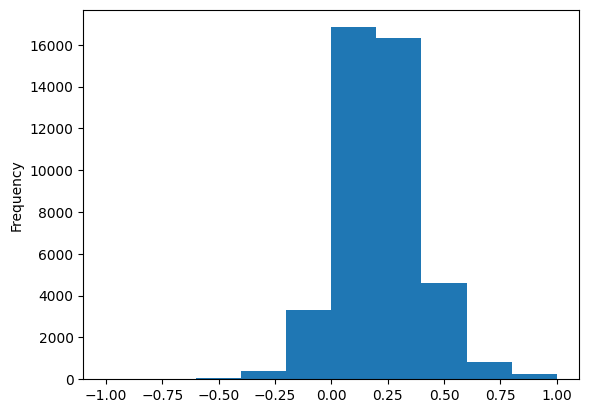

In [13]:
df["textblob_polarity"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

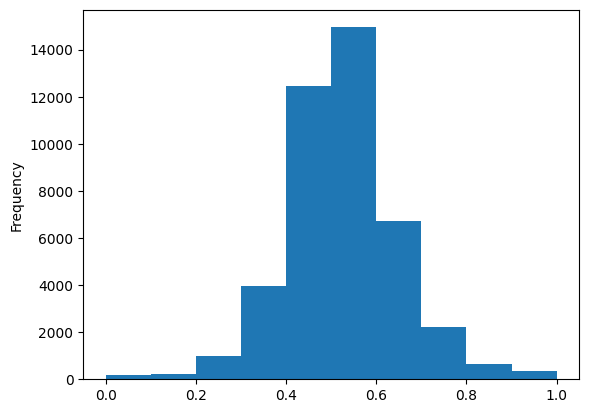

In [14]:
df["textblob_subjectivity"].plot.hist()

In [34]:
df['tb_Sentiment_Type'] = ''
df.loc[df["textblob_polarity"]>0,'tb_Sentiment_Type']='POSITIVE'
df.loc[df["textblob_polarity"]==0,'tb_Sentiment_Type']='NEUTRAL'
df.loc[df["textblob_polarity"]<0,'tb_Sentiment_Type']='NEGATIVE'

<AxesSubplot:>

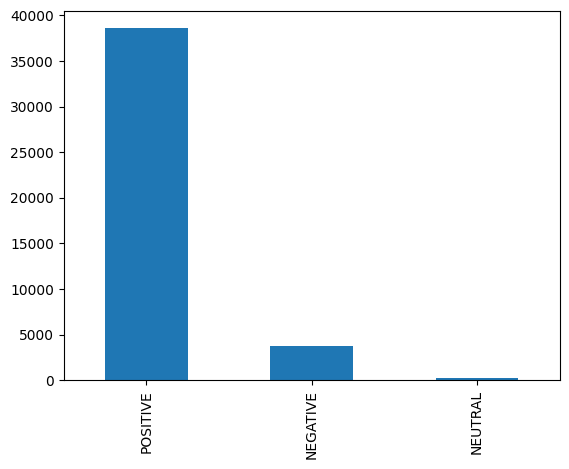

In [35]:
df['tb_Sentiment_Type'].value_counts().plot.bar()

# Vader

In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
vs = []

for sentence in df["Review_Text"]:
    vs.append(analyzer.polarity_scores(sentence))

In [19]:
df["vs_score"] = vs

In [20]:
df['compound'] = df['vs_score'].apply(lambda score_dict: score_dict['compound'])
df['vs_sentiment_type']=''
df.loc[df.compound>0,'vs_sentiment_type']='POSITIVE'
df.loc[df.compound==0,'vs_sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'vs_sentiment_type']='NEGATIVE'

In [24]:
# Define custom thresholds
positive_threshold = 0.5
negative_threshold = -0.5

# Assign sentiment types based on custom thresholds
df['vs_sentiment_type'] = ''
df.loc[df.compound > positive_threshold, 'vs_sentiment_type'] = 'POSITIVE'
df.loc[(df.compound >= negative_threshold) & (df.compound <= positive_threshold), 'vs_sentiment_type'] = 'NEUTRAL'
df.loc[df.compound < negative_threshold, 'vs_sentiment_type'] = 'NEGATIVE'


In [25]:
df.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,textblob_polarity,textblob_subjectivity,tb_Sentiment_Type,vs_score,compound,vs_sentiment_type
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,0.243981,0.561481,POSITIVE,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.7069,POSITIVE
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,0.236131,0.434649,POSITIVE,"{'neg': 0.044, 'neu': 0.76, 'pos': 0.195, 'com...",0.9853,POSITIVE
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,0.160498,0.422944,POSITIVE,"{'neg': 0.022, 'neu': 0.758, 'pos': 0.22, 'com...",0.9920,POSITIVE
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,0.189286,0.512143,POSITIVE,"{'neg': 0.078, 'neu': 0.768, 'pos': 0.154, 'co...",0.8425,POSITIVE
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,0.266667,0.437500,POSITIVE,"{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'comp...",0.2846,NEUTRAL


<AxesSubplot:>

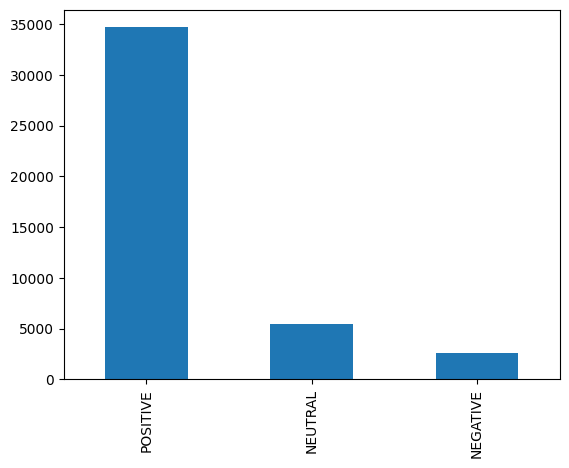

In [26]:
df['vs_sentiment_type'].value_counts().plot.bar()

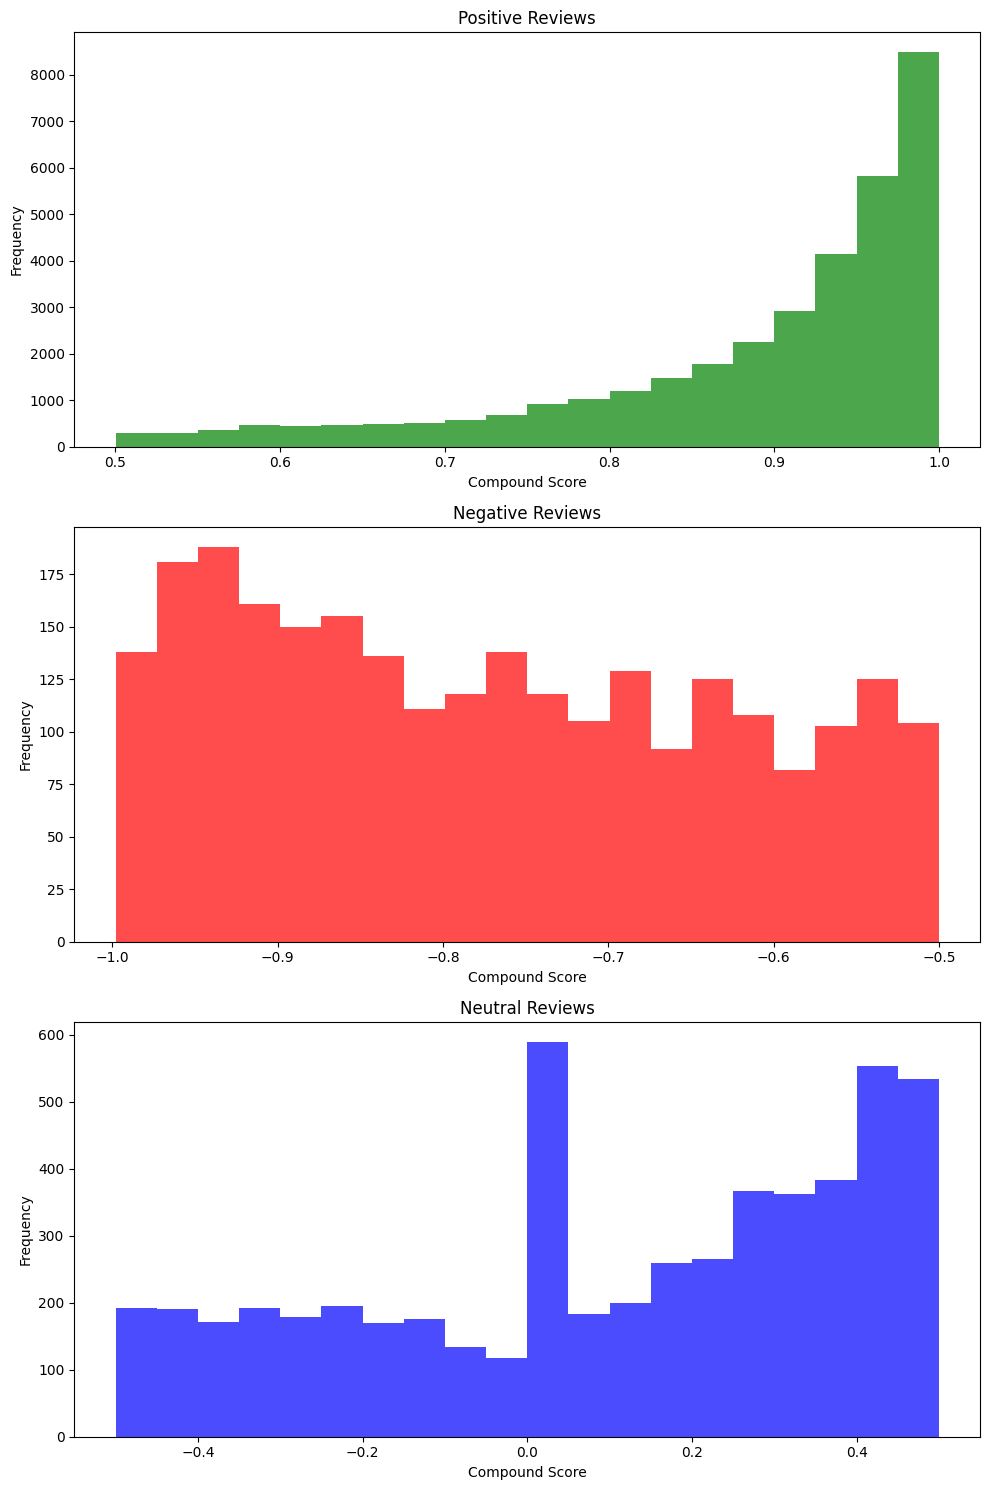

In [27]:
import matplotlib.pyplot as plt

# Filter the DataFrame based on sentiment types
positive_reviews = df[df['vs_sentiment_type'] == 'POSITIVE']
negative_reviews = df[df['vs_sentiment_type'] == 'NEGATIVE']
neutral_reviews = df[df['vs_sentiment_type'] == 'NEUTRAL']

# Create subplots for each sentiment type
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot positive reviews
axes[0].hist(positive_reviews['compound'], bins=20, color='g', alpha=0.7)
axes[0].set_title('Positive Reviews')
axes[0].set_xlabel('Compound Score')
axes[0].set_ylabel('Frequency')

# Plot negative reviews
axes[1].hist(negative_reviews['compound'], bins=20, color='r', alpha=0.7)
axes[1].set_title('Negative Reviews')
axes[1].set_xlabel('Compound Score')
axes[1].set_ylabel('Frequency')

# Plot neutral reviews
axes[2].hist(neutral_reviews['compound'], bins=20, color='b', alpha=0.7)
axes[2].set_title('Neutral Reviews')
axes[2].set_xlabel('Compound Score')
axes[2].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# NLTK

In [23]:
import nltk
from nltk import FreqDist
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import state_union

### Frequent words

In [24]:
stopwords = nltk.corpus.stopwords.words("english")

In [25]:
text = " ".join(review for review in df["Review_Text"])
print ("There are {} words in the combination of all review.".format(len(text)))

There are 29766104 words in the combination of all review.


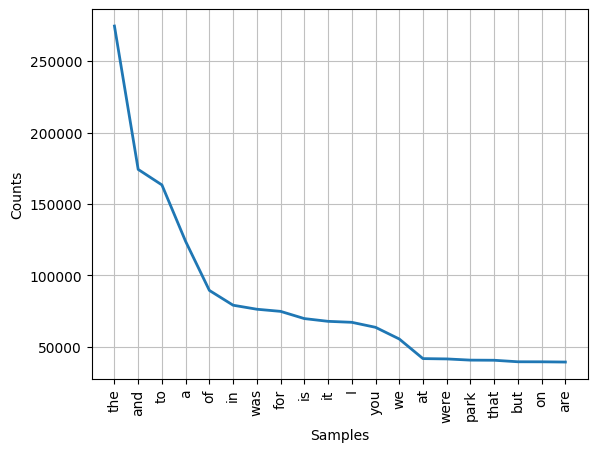

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
tokenizer = RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
freq = FreqDist(tokens)
freq.plot(20)

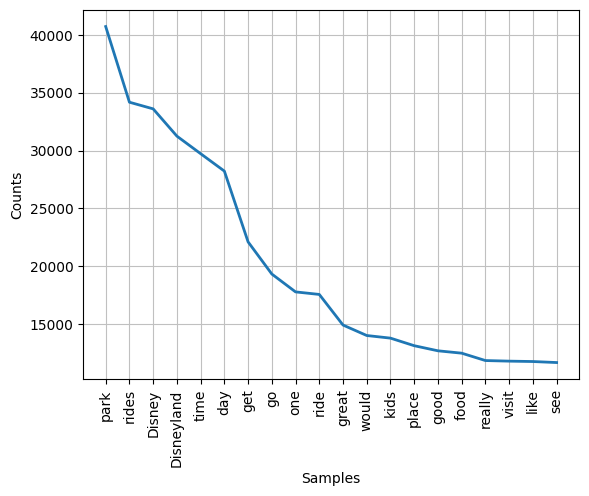

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [27]:
words = [w for w in tokens if w.lower() not in stopwords] # excluding stopwords
freq = FreqDist(words)
freq.plot(20)

In [28]:
freq.tabulate(10) # the most frequent 10 words

      park      rides     Disney Disneyland       time        day        get         go        one       ride 
     40725      34179      33603      31245      29726      28219      22095      19314      17768      17549 


#### Concordance & Collocations

In the context of NLP, a concordance is a collection of word locations along with their context. You can use concordances to find:

How many times a word appears?

Where each occurrence appears?

What words surround each occurrence?

In [29]:
text2 = nltk.Text(words)
text2.concordance("park", lines=10)

Displaying 10 of 45346 matches:
 Disney brand Seems local like Ocean Park even worst got SMILING face wanna u 
nts Last also Starbucks inside theme park Thanks God hot humid visiting park o
e park Thanks God hot humid visiting park otherwise would big issue lot shade 
nderwhelmed choice rides attractions park quite small really expecting somethi
 enjoyed HK Disneyland great compact park Unfortunately quite bit maintenance 
 expensive Disneyland well Basically park good small children people never Dis
mid week biggest disappointment food Park Even Maxim decent Restaurant Main St
king could find map place priced fun park Disney characters 2 seen cabana phot
nd day went early went straight back park lineups children got go many rides t
s general food drink expensive small park easily done 1 day huge enough visit 


Collocations are series of words that frequently appear together in a given text.

In the State of the Union corpus, for example, you’d expect to find the words United and States appearing next to each other very often. Those two words appearing together is a collocation.


In [30]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(text2)
finder.ngram_fd.most_common(10)

[(('happiest', 'place', 'earth'), 1010),
 (('Hong', 'Kong', 'Disneyland'), 910),
 (('Big', 'Thunder', 'Mountain'), 752),
 (('year', 'old', 'daughter'), 459),
 (('4', 'year', 'old'), 449),
 (('get', 'fast', 'pass'), 434),
 (('fast', 'pass', 'system'), 431),
 (('Walt', 'Disney', 'World'), 418),
 (('Disneyland', 'California', 'Adventure'), 411),
 (('day', 'park', 'hopper'), 402)]

#### NLTK Sentiment Analyzer

In [1]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/miemie/nltk_data...
[nltk_data]   Unzipping sentiment/vader_lexicon.zip.


In [18]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [19]:
# Download the stopwords data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miemie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
sia = SentimentIntensityAnalyzer()

In [10]:
nltk_score = []

for review in df["Review_Text"]:
    nltk_score.append(sia.polarity_scores(review))

In [16]:
df["nltk_score"] = nltk_score
df["nltk_score"]

0        {'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...
1        {'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...
2        {'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...
3        {'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...
4        {'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...
                               ...                        
42651    {'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...
42652    {'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...
42653    {'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...
42654    {'neg': 0.0, 'neu': 0.847, 'pos': 0.153, 'comp...
42655    {'neg': 0.026, 'neu': 0.806, 'pos': 0.168, 'co...
Name: nltk_score, Length: 42656, dtype: object

In [12]:
df['nltk_compound'] = df['nltk_score'].apply(lambda score_dict: score_dict['compound'])
df['nltk_sentiment_type']=''
df.loc[df.nltk_compound>0,'nltk_sentiment_type']='POSITIVE'
df.loc[df.nltk_compound==0,'nltk_sentiment_type']='NEUTRAL'
df.loc[df.nltk_compound<0,'nltk_sentiment_type']='NEGATIVE'

<AxesSubplot:>

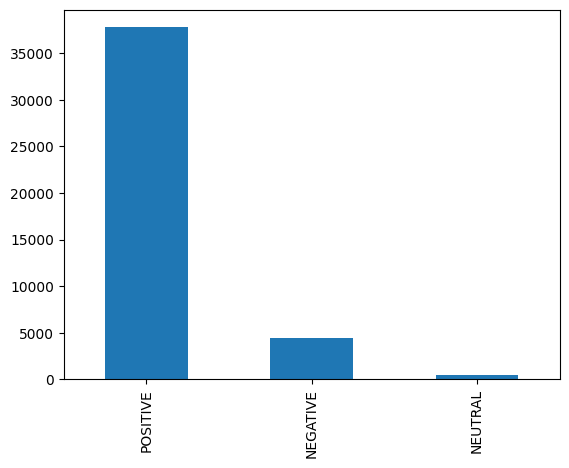

In [13]:
df['nltk_sentiment_type'].value_counts().plot.bar()

In [20]:
# Create a tokenizer instance and define the stopwords set
tokenizer = RegexpTokenizer(r'\w+')
stopwords = set(stopwords.words('english'))

In [21]:
# Negative review frequent word list:
neg_review = df[df['nltk_sentiment_type']=='NEGATIVE']["Review_Text"]

neg_text = " ".join(review for review in neg_review)
neg_tokens = tokenizer.tokenize(neg_text)
neg_words = [w for w in neg_tokens if w.lower() not in stopwords] # excluding stopwords

freq = FreqDist(neg_words)
freq.most_common(10)

[('park', 4221),
 ('Disney', 3687),
 ('rides', 3584),
 ('Disneyland', 2781),
 ('day', 2484),
 ('time', 2444),
 ('get', 2314),
 ('ride', 1971),
 ('one', 1957),
 ('go', 1896)]